In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles
from sklearn.datasets import make_moons

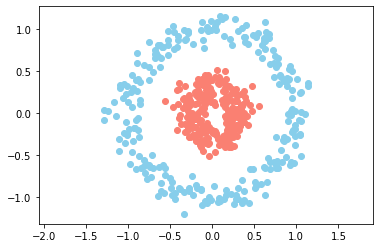

In [2]:
# Creación Datos

n = 500
p = 2 

X, Y = make_circles(n_samples = n, factor = 0.3, noise = 0.1)
Y = Y[:,np.newaxis]

plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c = "skyblue")
plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c = "salmon")
plt.axis("equal")
plt.show()

## Clase de la capa de la red

In [3]:
class neural_layer():
    
    def __init__(self,  
                 n_conn, # Número de conexiones
                 n_neur, # Número de neuronas
                 act_f):   # Función de activación
        
        self.act_f = act_f
        
        self.b = np.random.rand(1, n_neur) * 2 - 1 # Número aleatorio entre -1 y 1
        self.W = np.random.rand(n_conn, n_neur) * 2 - 1 # Número aleatorio entre -1 y 1

## Funciones de activación

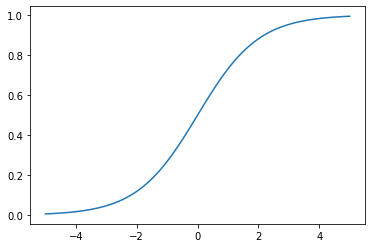

In [4]:
# Función sigmoide y su derivada

sigm = (lambda x: 1/(1+np.e ** (-x)),
        lambda x: x*(1-x))

_x = np.linspace(-5, 5, 100)
plt.plot(_x,sigm[0](_x))


# Función relu

relu = lambda x: np.maximum(0,x)

In [5]:
def create_nn(topology, act_f):
    nn = []
    
    for l, layer in enumerate(topology[:-1]):
        nn.append(neural_layer(topology[l],topology[l+1],act_f))
        
    return nn 

topology = [p, 4, 8, 1]

create_nn(topology, sigm)

In [6]:
neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp-Yr)**2),
           lambda Yp, Yr: (Yp - Yr))

def train(neural_net, X, Y, l2_cost, lr = 0.5, train = True):
    
    out = [(None, X)]
    
    #Forward pass
    for l , layer in enumerate(neural_net):
        z = out[-1][1] @ neural_net[l].W + neural_net[l].b
        a = neural_net[l].act_f[0](z)
        
        out.append((z,a))

    #print(l2_cost[0](out[-1][1], Y))
    
    if train:
        # Backward pass
        deltas = []
        
        for l in reversed(range(0,len(neural_net))):
            
            z = out[l+1][0]
            a = out[l+1][1]
            
            if l == len(neural_net) -1:
                # Calcular delta última capa
                deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
            else:
                # Calcular delta especto a la capa previa
                deltas.insert(0, deltas[0] @ _W.T * neural_net[l].act_f[1](a))
            
            _W = neural_net[l].W 
            
            # Gradient descent
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis=0, keepdims = True) * lr
            neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
    return out[-1][1]

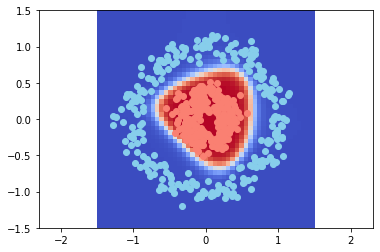

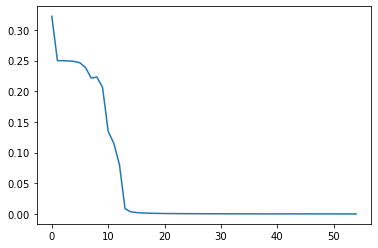

KeyboardInterrupt: 

In [9]:
import time
from IPython.display import clear_output

topology = [p, 4, 8, 4, 1]

neural_n = create_nn(topology,sigm)

loss = []

for i in range(2500):
    
    #Entrenemos la red
    pY = train(neural_n, X, Y, l2_cost, lr = 0.05)
    
    if i % 25 == 0:
        print(pY)
        loss.append(l2_cost[0](pY,Y))
        
        res = 50
        _x0 = np.linspace(-1.5,1.5, res)
        _x1 = np.linspace(-1.5,1.5, res)
        _Y  = np.zeros((res,res))
        
        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0,i1] = train(neural_n, np.array([[x0,x1]]), Y, l2_cost, train = False)[0][0]
        
        plt.pcolormesh(_x0,_x1,_Y,cmap = "coolwarm")
        plt.axis("equal")
        
        plt.scatter(X[Y[:,0] == 0, 0], X[Y[:,0] == 0, 1], c = "skyblue")
        plt.scatter(X[Y[:,0] == 1, 0], X[Y[:,0] == 1, 1], c = "salmon")
        
        clear_output(wait= True)
        plt.show()
        plt.plot(range(len(loss)), loss)
        plt.show()
        time.sleep(0.5)
            